<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.497451,50.341023,0.745285,125.583759,124.892046,0.691713
1,0.0,1.0,38.682329,41.096302,0.117128,89.895758,89.863170,0.032589
2,0.0,2.0,29.404417,50.588192,-0.343584,89.649025,90.068560,-0.419534
3,0.0,3.0,85.967678,82.758674,0.098390,178.824742,178.716117,0.108625
4,0.0,4.0,83.894354,84.063867,-0.050516,177.907706,177.947323,-0.039617
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,39.150744,33.983917,0.325762,83.460422,83.308574,0.151849
59996,999.0,56.0,44.476548,30.991467,0.182012,85.650027,85.653006,-0.002979
59997,999.0,57.0,75.880234,94.694743,-0.178379,180.396598,180.636368,-0.239769
59998,999.0,58.0,29.257969,53.810582,0.508604,93.577155,93.188751,0.388404


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.497451  50.341023  0.745285  125.583759  124.892046  0.691713
      1.0    38.682329  41.096302  0.117128   89.895758   89.863170  0.032589
      2.0    29.404417  50.588192 -0.343584   89.649025   90.068560 -0.419534
      3.0    85.967678  82.758674  0.098390  178.824742  178.716117  0.108625
      4.0    83.894354  84.063867 -0.050516  177.907706  177.947323 -0.039617
...                ...        ...       ...         ...         ...       ...
999.0 55.0   39.150744  33.983917  0.325762   83.460422   83.308574  0.151849
      56.0   44.476548  30.991467  0.182012   85.650027   85.653006 -0.002979
      57.0   75.880234  94.694743 -0.178379  180.396598  180.636368 -0.239769
      58.0   29.257969  53.810582  0.508604   93.577155   93.188751  0.388404
      59.0   31.298091  48.981603 -0.494717   89.784977   90.412690 -0.627713

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.497451  50.341023  0.745285  125.583759  124.892046  0.691713
      1.0    38.682329  41.096302  0.117128   89.895758   89.863170  0.032589
      2.0    29.404417  50.588192 -0.343584   89.649025   90.068560 -0.419534
      3.0    85.967678  82.758674  0.098390  178.824742  178.716117  0.108625
      4.0    83.894354  84.063867 -0.050516  177.907706  177.947323 -0.039617
...                ...        ...       ...         ...         ...       ...
999.0 55.0   39.150744  33.983917  0.325762   83.460422   83.308574  0.151849
      56.0   44.476548  30.991467  0.182012   85.650027   85.653006 -0.002979
      57.0   75.880234  94.694743 -0.178379  180.396598  180.636368 -0.239769
      58.0   29.257969  53.810582  0.508604   93.577155   93.188751  0.388404
      59.0   31.298091  48.981603 -0.494717   89.784977   90.412690 -0.627713

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.497451,50.341023,0.745285,125.583759,124.892046,0.691713
1,0.0,1.0,38.682329,41.096302,0.117128,89.895758,89.863170,0.032589
2,0.0,2.0,29.404417,50.588192,-0.343584,89.649025,90.068560,-0.419534
3,0.0,3.0,85.967678,82.758674,0.098390,178.824742,178.716117,0.108625
4,0.0,4.0,83.894354,84.063867,-0.050516,177.907706,177.947323,-0.039617
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,39.150744,33.983917,0.325762,83.460422,83.308574,0.151849
59996,999.0,56.0,44.476548,30.991467,0.182012,85.650027,85.653006,-0.002979
59997,999.0,57.0,75.880234,94.694743,-0.178379,180.396598,180.636368,-0.239769
59998,999.0,58.0,29.257969,53.810582,0.508604,93.577155,93.188751,0.388404


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.497451  50.341023  0.745285  125.583759  124.892046  0.691713
      1.0    38.682329  41.096302  0.117128   89.895758   89.863170  0.032589
      2.0    29.404417  50.588192 -0.343584   89.649025   90.068560 -0.419534
      3.0    85.967678  82.758674  0.098390  178.824742  178.716117  0.108625
      4.0    83.894354  84.063867 -0.050516  177.907706  177.947323 -0.039617
...                ...        ...       ...         ...         ...       ...
999.0 55.0   39.150744  33.983917  0.325762   83.460422   83.308574  0.151849
      56.0   44.476548  30.991467  0.182012   85.650027   85.653006 -0.002979
      57.0   75.880234  94.694743 -0.178379  180.396598  180.636368 -0.239769
      58.0   29.257969  53.810582  0.508604   93.577155   93.188751  0.388404
      59.0   31.298091  48.981603 -0.494717   89.784977   90.412690 -0.627713

[60000 rows x 6 columns]

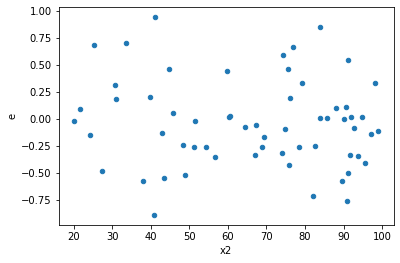

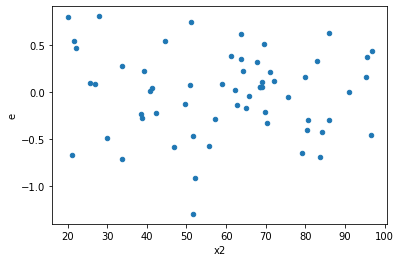

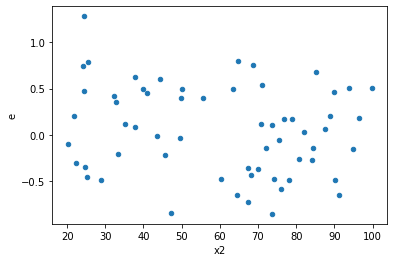

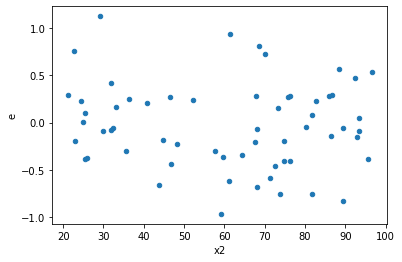

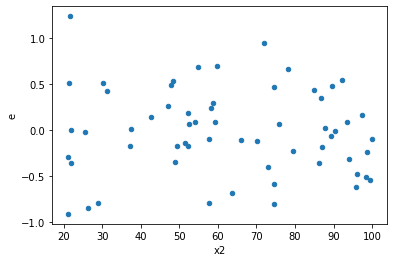

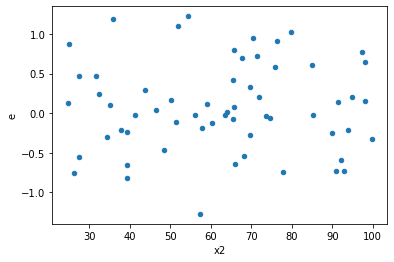

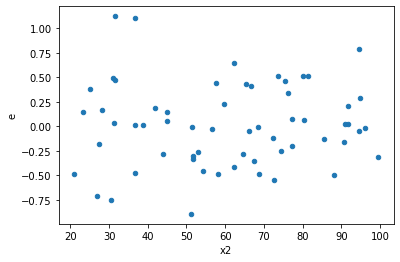

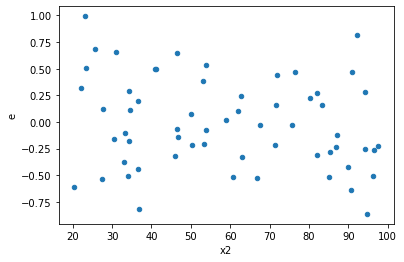

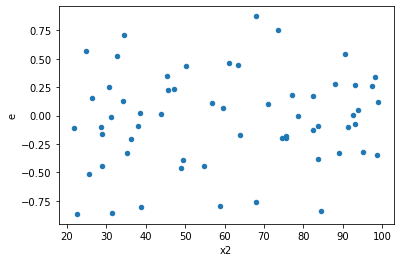

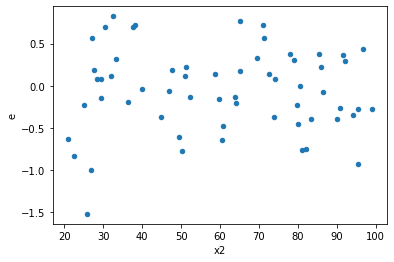

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,28.0,28.0,3.8486539413015453,5.260324710018839,0.1374519264750552,0.18786873964352996,1.3667959734098338,0.41351336443883424,0.7932433177805829,0.20675668221941712,Reject005=1 : Homoscedasticity
3.0,37.0,19.0,9.327442230320694,5.730248889796111,0.2520930332519106,0.30159204683137425,1.1963521678522564,0.6910042526639351,0.6544978736680325,0.34550212633196753,Reject005=1 : Homoscedasticity
4.0,28.0,28.0,4.646027172628566,8.634796554149673,0.16592954187959164,0.3083855912196312,1.8585333734207148,0.10682842803407588,0.9465857859829621,0.05341421401703794,Reject005=1 : Homoscedasticity
5.0,28.0,28.0,5.01422065378071,7.985059182682974,0.1790793090635968,0.2851806850958205,1.592482607773206,0.22447115906071624,0.8877644204696419,0.11223557953035812,Reject005=1 : Homoscedasticity
6.0,24.0,32.0,3.700077684472403,8.406790605166101,0.15416990351968346,0.26271220641144066,1.7040433989627501,0.15824531540972897,0.9208773422951355,0.07912265770486449,Reject005=1 : Homoscedasticity
7.0,29.0,27.0,5.3781349122565265,5.1987258260388645,0.18545292800884575,0.1925454009644024,1.038244060267511,0.9252669069444865,0.5373665465277567,0.4626334534722433,Reject005=1 : Homoscedasticity
10.0,24.0,32.0,3.1408330087386216,6.002632003047161,0.1308680420307759,0.18758225009522378,1.4333694245315487,0.33799470272908994,0.831002648635455,0.16899735136454497,Reject005=1 : Homoscedasticity
11.0,28.0,28.0,4.9669884759276055,5.616475572988887,0.17739244556884307,0.20058841332103167,1.1307607416866388,0.7473404439165456,0.6263297780417272,0.3736702219582728,Reject005=1 : Homoscedasticity
14.0,30.0,26.0,4.790753254743887,7.548298259021886,0.15969177515812957,0.29031916380853406,1.817996972737356,0.12543706084665818,0.9372814695766709,0.06271853042332909,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,25.0,7.196581605921857,4.042266598853821,0.23214779373941474,0.16169066395415285,0.6964988180574749,0.33699205665324244,Reject005=1 : Homoscedasticity
1.0,28.0,28.0,3.8486539413015453,5.260324710018839,0.1374519264750552,0.18786873964352996,1.3667959734098338,0.41351336443883424,Reject005=1 : Homoscedasticity
2.0,31.0,25.0,3.507733904302273,2.5899853016689427,0.1131527065903959,0.10359941206675771,0.9155716658354415,0.8072861351182921,Reject005=1 : Homoscedasticity
3.0,37.0,19.0,9.327442230320694,5.730248889796111,0.2520930332519106,0.30159204683137425,1.1963521678522564,0.6910042526639351,Reject005=1 : Homoscedasticity
4.0,28.0,28.0,4.646027172628566,8.634796554149673,0.16592954187959164,0.3083855912196312,1.8585333734207148,0.10682842803407588,Reject005=1 : Homoscedasticity
5.0,28.0,28.0,5.01422065378071,7.985059182682974,0.1790793090635968,0.2851806850958205,1.592482607773206,0.22447115906071624,Reject005=1 : Homoscedasticity
6.0,24.0,32.0,3.700077684472403,8.406790605166101,0.15416990351968346,0.26271220641144066,1.7040433989627501,0.15824531540972897,Reject005=1 : Homoscedasticity
7.0,29.0,27.0,5.3781349122565265,5.1987258260388645,0.18545292800884575,0.1925454009644024,1.038244060267511,0.9252669069444865,Reject005=1 : Homoscedasticity
8.0,28.0,28.0,4.23177589904859,4.210272876244447,0.15113485353744965,0.15036688843730167,0.9949186763862005,0.9893418526610501,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      904
Reject005=0 : Heteroscedasticity     96
Name: Result_test, dtype: int64